# 🩺 Diabetes Prediction Using Decision Tree

This notebook predicts the likelihood of diabetes in patients using the PIMA Indian Diabetes dataset and a Decision Tree Classifier. It involves data cleaning, model training, evaluation, and visualization.


📌  Import Libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

📌  Load Dataset 

In [3]:
df=pd.read_csv("C:/Users/eq5cd/Downloads/diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


📌  Dataset Overview

In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

📌  Data Cleaning

In [5]:
cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero_as_missing:
    df[col] = df[col].replace(0, np.nan)

for col in cols_with_zero_as_missing:
    df[col]=df[col].fillna(df[col].median())

print(df.describe())    
    


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

📌  Train-Test Split

In [6]:
X=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(
    X, y, test_size=0.2, random_state=42)

📌  Train Decision Tree Model

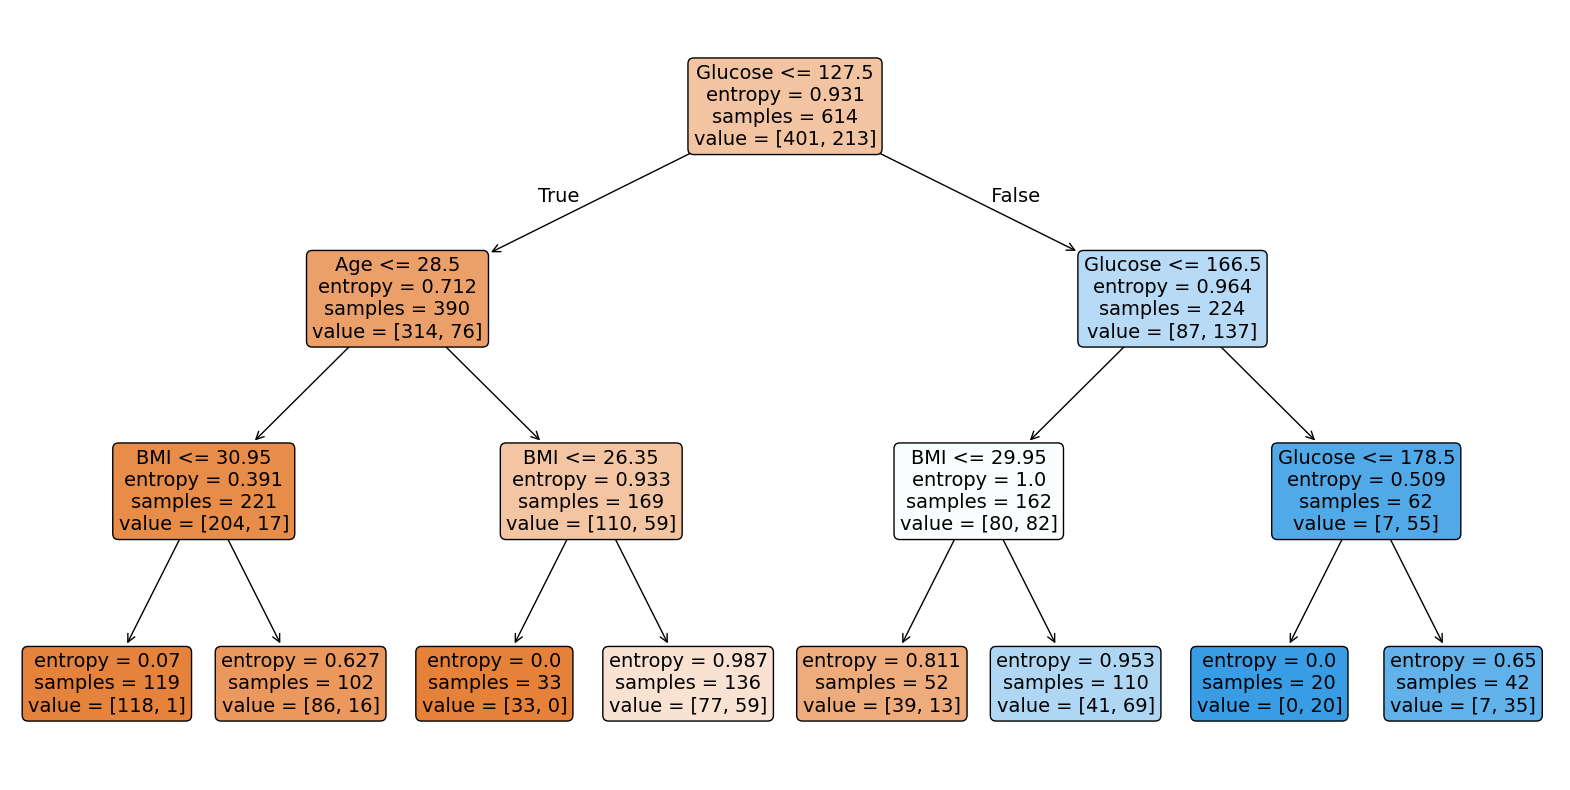

In [9]:
dtree=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=100)
dtree=dtree.fit(X_train,y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True)
plt.show()



📌 Model Evaluation

In [10]:
y_pred=dtree.predict(X_test)
print("accuracy score",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

accuracy score 0.7727272727272727

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



## 📊 Feature Importance


In [11]:

importances = dtree.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


print(feature_importances)


                    Feature  Importance
1                   Glucose    0.549877
5                       BMI    0.275664
7                       Age    0.174458
0               Pregnancies    0.000000
3             SkinThickness    0.000000
2             BloodPressure    0.000000
4                   Insulin    0.000000
6  DiabetesPedigreeFunction    0.000000


In [ ]:
📌 1️⃣1️⃣ Feature Importance Plot

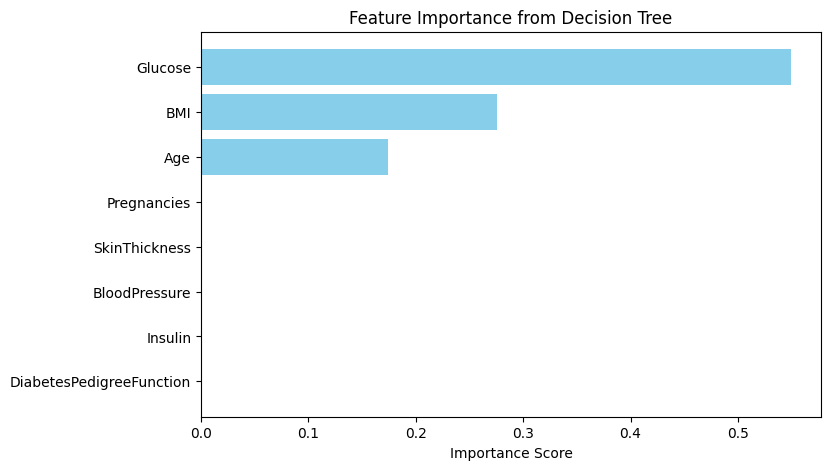

In [12]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(8,5))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()  
plt.show()


## 🔮 Predicting on New Patient Data

Let's test our trained Decision Tree model on a new patient's data.

In [13]:
new_data = pd.DataFrame([[5, 130, 70, 25, 100, 32.0, 0.5, 35]], 
                        columns=X.columns)

prediction = dtree.predict(new_data)

print("Prediction (0 = No Diabetes, 1 = Diabetes):", prediction)


Prediction (0 = No Diabetes, 1 = Diabetes): [1]


## ✅ Conclusion

- Best model accuracy: **77.27%** with max_depth=3.
- **Most important features**: Glucose, BMI, and Age.
- Decision Tree proved to be a good interpretable model for this classification problem.
